In [259]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [261]:
img = cv2.imread(r"C:\Users\ranveer\Documents\classification\model\test image\sharapova.jpg")
#importing images


In [263]:
img.shape


(739, 962, 3)

In [265]:
plt.imshow(img)

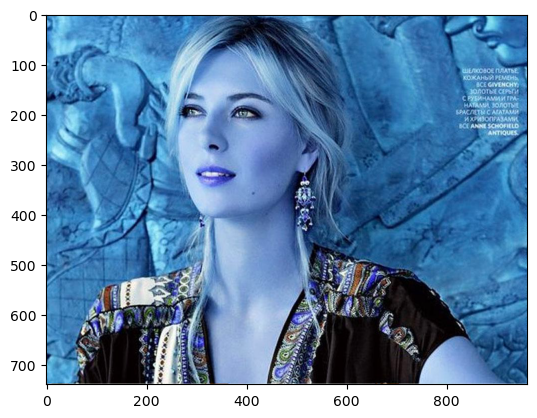

In [267]:
plt.show()

In [269]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # convert image to grayscale

In [271]:
gray.shape

(739, 962)

In [273]:
gray

array([[144, 145, 146, ..., 119, 117, 123],
       [139, 141, 143, ..., 125, 123, 128],
       [130, 133, 137, ..., 129, 126, 132],
       ...,
       [168, 157, 158, ..., 117,  92,  84],
       [171, 154, 151, ..., 113,  95,  88],
       [133, 116, 121, ..., 194, 184, 178]], dtype=uint8)

In [275]:
plt.imshow(gray, cmap="gray") # making sure the image is converted to gray by plotting the image

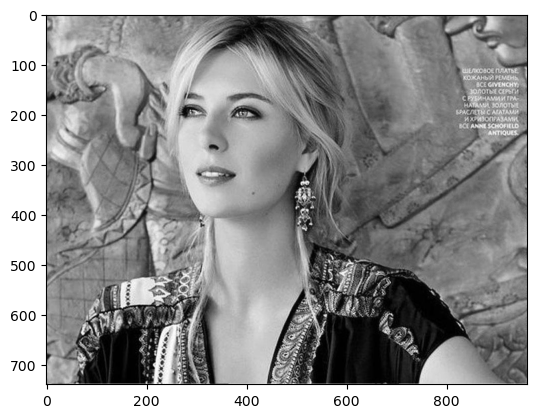

In [277]:
plt.show()

In [278]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\ranveer\Documents\classification\model\opencv\data\haarcascades\haarcascade_frontalface_default.xml")
if face_cascade.empty():
    print("Error loading cascade classifier") #  using haarcascade for image detection and it only uses grey images

In [281]:
eye_cascade = cv2.CascadeClassifier(r"C:\Users\ranveer\Documents\classification\model\opencv\data\haarcascades\haarcascade_eye.xml")

In [283]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
print(faces)

[[182  69 331 331]]


In [285]:
(x,y,w,h) = faces[0]

In [287]:
x,y,w,h

(182, 69, 331, 331)

In [289]:
face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2) # plotting the detected image of the face
plt.imshow(face_img)

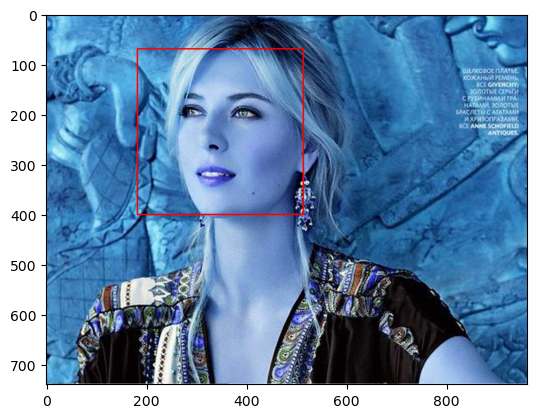

In [291]:
plt.show()

In [292]:
#cv2.destroyAllWindows()
#for (x,y,w,h) in faces:
 #   face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  #  roi_gray = gray[y:y+h,x:x+w]
   # roi_color = face_img[y:y+h,x:x+w]
    #eyes = eye_cascade.detectMultiScale(roi_gray)
    #for(ex,ey,ew,eh) in eyes:
     #   cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

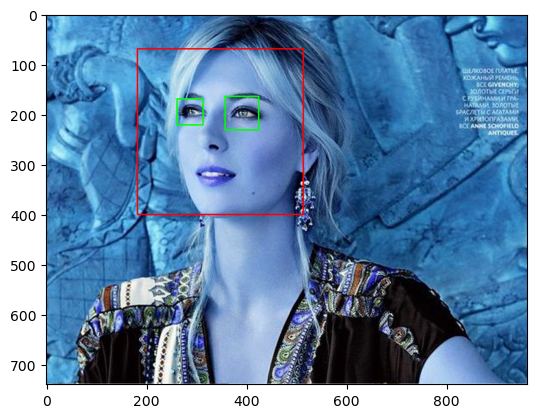

In [295]:
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]

    # Detect eyes within the face region
    eyes = eye_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.1,
        minNeighbors=10,
        minSize=(20, 20)
    )

    for (ex, ey, ew, eh) in eyes:
        # Validate eye location (e.g., in the upper half of the face)
        if ey < h // 2:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)


plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

In [296]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray') # roi means reagion of interest

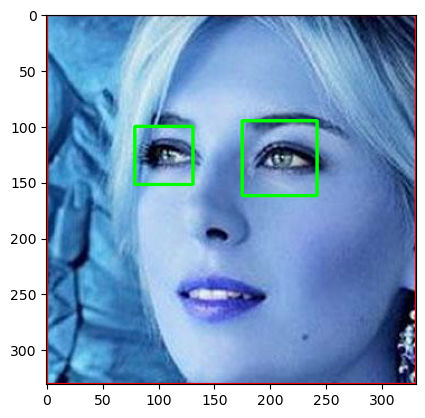

In [299]:
plt.show()

In [301]:
def get_cropped_image_if_2_eyes(image_path): # function for creating cropped image
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # If no faces are detected, return None
    if len(faces) == 0:
        return None
    
    # Process each detected face
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.1,
            minNeighbors=10,
            minSize=(20, 20)
        )

        # If at least two eyes are detected, return the cropped image
        if len(eyes) >= 2:
            return roi_color

    return None  # Return None if no faces or no eyes are detected

    

In [303]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\ranveer\Documents\classification\model\test image\sharapova.jpg")

In [305]:
plt.imshow(cropped_image)


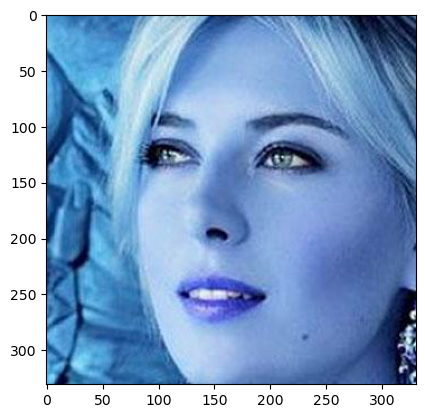

In [307]:
plt.show()

In [309]:
path_to_data = "./images_dataset/"

In [311]:
path_to_cr_data = "./images_dataset/cropped/"

In [313]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [315]:
img_dirs # complete path of individual folders for each of the players

['./images_dataset/cropped',
 './images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [317]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [319]:

cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli


In [321]:

# found this function on stack over flow
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar', level = 1):
    #data type conversion
    #convert to greyscale
    iAmarray = img
    iAmarray = cv2.cvtColor(iAmarray,cv2.COLOR_RGB2GRAY)
    #convert to float
    iAmarray = np.float32(iAmarray)
    iAmarray/=255
    #comput coefecients
    coeffs =pywt.wavedec2(iAmarray,mode, level = level)

    #process coeffecients
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0

    iAmarray_H = pywt.waverec2(coeffs_H, mode);
    iAmarray_H *= 255
    iAmarray_H = np.uint8(iAmarray_H)

    return iAmarray_H

In [323]:
#Converts it to grayscale and normalizes it.
#Decomposes the image into wavelet components using a 2D wavelet transform.
#Removes low-frequency components to retain only high-frequency details.
#Reconstructs the image from the high-frequency components.
#Returns the processed image, highlighting edges and textures

#the w2d function follows the above steps for feature extraction ( it retains only the high frequency components

In [392]:
im_har = w2d(cropped_image,'db1',3)
plt.imshow(im_har, cmap = 'gray')


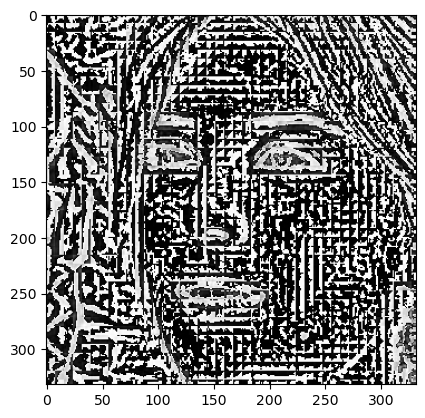

In [394]:
plt.show()

In [329]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped/lionel_messi\\lionel_messi1.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi10.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi11.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi12.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi13.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi14.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi15.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi16.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi18.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi19.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi2.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi20.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi21.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi22.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi23.png',
  './images_dataset/cropped/lionel_messi\

In [331]:
# this code assigns a unique numeric value to each celebrity name 
class_dict = {} 
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [472]:

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',4)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [473]:
len(X[0])

4096

In [474]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(125, 4096)

In [478]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.75

In [482]:
len(X_test)

32

In [484]:
# i am getting 88 percent accuracy 

print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.71      0.83      0.77         6
           2       0.75      0.60      0.67         5
           3       0.71      0.83      0.77         6
           4       0.75      1.00      0.86         6

    accuracy                           0.75        32
   macro avg       0.75      0.76      0.75        32
weighted avg       0.76      0.75      0.74        32



In [486]:
# use gridsearch to try out differrent modals with differrent parameters, goal is to come up with best modal with best tuned parameters
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [488]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [490]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated i

,model,best_score,best_params
0,svm,0.836842,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.667251,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.880117,{'logisticregression__C': 1}


In [491]:
best_estimators['svm'].score(X_test,y_test)

0.8125

In [492]:
best_estimators['random_forest'].score(X_test,y_test)

0.6875

In [493]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.75

In [494]:
best_clf = best_estimators['svm']

In [495]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 0, 0, 2, 0],
       [0, 5, 1, 0, 0],
       [1, 0, 3, 1, 0],
       [0, 0, 1, 5, 0],
       [0, 0, 0, 0, 6]], dtype=int64)

In [496]:
class_dict
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [497]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


Text(95.72222222222221, 0.5, 'Truth')

In [498]:

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))